In [1]:
import pandas as pd
import numpy as np

In [74]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sentence_transformers import SentenceTransformer
import sklearn.cluster as cluster

In [10]:
data=pd.read_csv('train.csv')

In [11]:
data.shape

(159571, 8)

In [12]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Exploratory Data Analysis

In [13]:
data_df=data[['comment_text']]

In [14]:
data_df.head()

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."


## To Lowercase

In [15]:
data_df['comment_text_data']=data_df['comment_text'].map(lambda x: str(x).lower())

C:\Users\devel\AppData\Local\Temp\ipykernel_17620\1734653418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['comment_text_data']=data_df['comment_text'].map(lambda x: str(x).lower())


In [16]:
data_df.head()

,comment_text,comment_text_data
0,Explanation\nWhy the edits made under my usern...,explanation\nwhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...,d'aww! he matches this background colour i'm s...
2,"Hey man, I'm really not trying to edit war. It...","hey man, i'm really not trying to edit war. it..."
3,"""\nMore\nI can't make any real suggestions on ...","""\nmore\ni can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember...","you, sir, are my hero. any chance you remember..."


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   comment_text       159571 non-null  object
 1   comment_text_data  159571 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [18]:
data_df.isnull().sum()

comment_text         0
comment_text_data    0
dtype: int64

# Removing special characters,URLS and keeping only text

In [19]:
data_df['comment_text_data'] = data_df['comment_text_data'].apply(lambda x: re.sub(r"https\S+|www\S+https\S+", '',x, flags=re.MULTILINE))

C:\Users\devel\AppData\Local\Temp\ipykernel_17620\416657162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['comment_text_data'] = data_df['comment_text_data'].apply(lambda x: re.sub(r"https\S+|www\S+https\S+", '',x, flags=re.MULTILINE))


In [20]:
data_df.comment_text_data

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text_data, Length: 159571, dtype: object

In [21]:
data_df['comment_text_data'][159566]

'":::::and for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? you can\'t even give a consistent argument - is the opening only supposed to mention significant aspects, or the ""most significant"" ones?   \n\n"'

In [22]:
data_df['comment_text_data']=data_df['comment_text_data'].apply(lambda x: re.sub(r'[^a-zA-Z ]+','',str(x)))

C:\Users\devel\AppData\Local\Temp\ipykernel_17620\1435833571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['comment_text_data']=data_df['comment_text_data'].apply(lambda x: re.sub(r'[^a-zA-Z ]+','',str(x)))


In [23]:
data_df['comment_text_data'][159566]

'and for the second time of asking when your view completely contradicts the coverage in reliable sources why should anyone care what you feel you cant even give a consistent argument  is the opening only supposed to mention significant aspects or the most significant ones   '

In [24]:
data_df.head()

,comment_text,comment_text_data
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...


In [25]:
data_df = data_df.drop_duplicates('comment_text_data')

In [26]:
data_df.shape

(158892, 2)

## Tokenize

In [27]:
tokens=word_tokenize(data_df.iloc[1]['comment_text_data'])

In [28]:
data_df.iloc[1]['comment_text_data']

'daww he matches this background colour im seemingly stuck with thanks  talk  january   utc'

In [29]:
word_tok=[]
for i in range(0,len(data_df)):
    #word_tok=[]
    tok=word_tokenize(data_df.iloc[i]['comment_text_data'])
    word_tok.append(tok)
data_df['Tokens']=word_tok

In [30]:
data_df.head()

,comment_text,comment_text_data,Tokens
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...,"[explanationwhy, the, edits, made, under, my, ..."
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...,"[daww, he, matches, this, background, colour, ..."
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...,"[hey, man, im, really, not, trying, to, edit, ..."
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...,"[morei, cant, make, any, real, suggestions, on..."
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re..."


## Stopwords

In [31]:
stopwordsEng = stopwords.words('English') 
stopwordsEng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
data_df['Without Stopwords']= 0

In [33]:
s_w=[]
for i in range(0,len(data_df)):
    ai_tokens_wo_stopwords=[]
    for word in data_df.iloc[i]['Tokens']:
        if not word in stopwordsEng:
            ai_tokens_wo_stopwords.append(word)
    s_w.append(ai_tokens_wo_stopwords)
#     print(ai_tokens_wo_stopwords)
data_df['Without Stopwords'] = s_w

In [34]:
data_df.head()

,comment_text,comment_text_data,Tokens,Without Stopwords
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...,"[explanationwhy, the, edits, made, under, my, ...","[explanationwhy, edits, made, username, hardco..."
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin..."
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...,"[hey, man, im, really, not, trying, to, edit, ...","[hey, man, im, really, trying, edit, war, guy,..."
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...,"[morei, cant, make, any, real, suggestions, on...","[morei, cant, make, real, suggestions, improve..."
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page, thats]"


In [35]:
' '.join(data_df['Without Stopwords'][0])

'explanationwhy edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired'

## lemmatization

In [36]:
lem = WordNetLemmatizer()

In [37]:
def lemm(x):
    tempList = []
    for word in x:
        tempList.append(lem.lemmatize(word, pos='n'))
    return tempList

data_df['Lemmatize']= data_df['Without Stopwords'].map(lambda x: lemm(x))

In [38]:
def stringjoin(x):
#     mystr=''
#     for words in string:
#         mystr = ' '.join(words)
    return ' '.join(x)

In [39]:
data_df['Comment_Text_Formatted']=data_df['Lemmatize'].map(lambda x: stringjoin(x))

In [40]:
data_df.head()

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...,"[explanationwhy, the, edits, made, under, my, ...","[explanationwhy, edits, made, username, hardco...","[explanationwhy, edits, made, username, hardco...",explanationwhy edits made username hardcore me...
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin...","[daww, match, background, colour, im, seemingl...",daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...,"[hey, man, im, really, not, trying, to, edit, ...","[hey, man, im, really, trying, edit, war, guy,...","[hey, man, im, really, trying, edit, war, guy,...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...,"[morei, cant, make, any, real, suggestions, on...","[morei, cant, make, real, suggestions, improve...","[morei, cant, make, real, suggestion, improvem...",morei cant make real suggestion improvement wo...
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page, thats]","[sir, hero, chance, remember, page, thats]",sir hero chance remember page thats


# Sentiment Analysis

In [41]:
def sent_analysis(text):
    return TextBlob(text).sentiment.polarity

In [42]:
data_df['sent_polarity'] = data_df['Comment_Text_Formatted'].map(lambda x: sent_analysis(x))

In [43]:
data_df.head()

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted,sent_polarity
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...,"[explanationwhy, the, edits, made, under, my, ...","[explanationwhy, edits, made, username, hardco...","[explanationwhy, edits, made, username, hardco...",explanationwhy edits made username hardcore me...,0.136364
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin...","[daww, match, background, colour, im, seemingl...",daww match background colour im seemingly stuc...,0.200000
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...,"[hey, man, im, really, not, trying, to, edit, ...","[hey, man, im, really, trying, edit, war, guy,...","[hey, man, im, really, trying, edit, war, guy,...",hey man im really trying edit war guy constant...,0.150000
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...,"[morei, cant, make, any, real, suggestions, on...","[morei, cant, make, real, suggestions, improve...","[morei, cant, make, real, suggestion, improvem...",morei cant make real suggestion improvement wo...,0.183333
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page, thats]","[sir, hero, chance, remember, page, thats]",sir hero chance remember page thats,0.000000


In [44]:
def sent_labels(x):
    if x <0:
        return "Neg"
    elif x ==0:
        return "Neu"
    elif x>0:
        return "Pos"

In [45]:
data_df['sent_labels'] = data_df['sent_polarity'].map(lambda x:sent_labels(x) )

In [46]:
data_df.head()

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted,sent_polarity,sent_labels
0,Explanation\nWhy the edits made under my usern...,explanationwhy the edits made under my usernam...,"[explanationwhy, the, edits, made, under, my, ...","[explanationwhy, edits, made, username, hardco...","[explanationwhy, edits, made, username, hardco...",explanationwhy edits made username hardcore me...,0.136364,Pos
1,D'aww! He matches this background colour I'm s...,daww he matches this background colour im seem...,"[daww, he, matches, this, background, colour, ...","[daww, matches, background, colour, im, seemin...","[daww, match, background, colour, im, seemingl...",daww match background colour im seemingly stuc...,0.200000,Pos
2,"Hey man, I'm really not trying to edit war. It...",hey man im really not trying to edit war its j...,"[hey, man, im, really, not, trying, to, edit, ...","[hey, man, im, really, trying, edit, war, guy,...","[hey, man, im, really, trying, edit, war, guy,...",hey man im really trying edit war guy constant...,0.150000,Pos
3,"""\nMore\nI can't make any real suggestions on ...",morei cant make any real suggestions on improv...,"[morei, cant, make, any, real, suggestions, on...","[morei, cant, make, real, suggestions, improve...","[morei, cant, make, real, suggestion, improvem...",morei cant make real suggestion improvement wo...,0.183333,Pos
4,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page, thats]","[sir, hero, chance, remember, page, thats]",sir hero chance remember page thats,0.000000,Neu


# checking the sent_label generated

In [47]:
data_df[data_df['sent_labels']=='Neg'].shape

(36900, 8)

In [48]:
data_df[data_df['sent_labels']=='Neg']

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted,sent_polarity,sent_labels
8,Sorry if the word 'nonsense' was offensive to ...,sorry if the word nonsense was offensive to yo...,"[sorry, if, the, word, nonsense, was, offensiv...","[sorry, word, nonsense, offensive, anyway, im,...","[sorry, word, nonsense, offensive, anyway, im,...",sorry word nonsense offensive anyway im intend...,-0.300000,Neg
9,alignment on this subject and which are contra...,alignment on this subject and which are contra...,"[alignment, on, this, subject, and, which, are...","[alignment, subject, contrary, dulithgow]","[alignment, subject, contrary, dulithgow]",alignment subject contrary dulithgow,-0.166667,Neg
25,Radial symmetry \n\nSeveral now extinct lineag...,radial symmetry several now extinct lineages i...,"[radial, symmetry, several, now, extinct, line...","[radial, symmetry, several, extinct, lineages,...","[radial, symmetry, several, extinct, lineage, ...",radial symmetry several extinct lineage includ...,-0.200000,Neg
26,There's no need to apologize. A Wikipedia arti...,theres no need to apologize a wikipedia articl...,"[theres, no, need, to, apologize, a, wikipedia...","[theres, need, apologize, wikipedia, article, ...","[there, need, apologize, wikipedia, article, m...",there need apologize wikipedia article made re...,-0.083333,Neg
27,"Yes, because the mother of the child in the ca...",yes because the mother of the child in the cas...,"[yes, because, the, mother, of, the, child, in...","[yes, mother, child, case, michael, jackson, s...","[yes, mother, child, case, michael, jackson, s...",yes mother child case michael jackson studied ...,-0.200000,Neg
...,...,...,...,...,...,...,...,...
159554,and i'm going to keep posting the stuff u dele...,and im going to keep posting the stuff u delet...,"[and, im, going, to, keep, posting, the, stuff...","[im, going, keep, posting, stuff, u, deleted, ...","[im, going, keep, posting, stuff, u, deleted, ...",im going keep posting stuff u deleted fucking ...,-0.366667,Neg
159556,"I'll be on IRC, too, if you have a more specif...",ill be on irc too if you have a more specific ...,"[ill, be, on, irc, too, if, you, have, a, more...","[ill, irc, specific, request]","[ill, irc, specific, request]",ill irc specific request,-0.250000,Neg
159563,"""\nplease identify what part of BLP applies be...",please identify what part of blp applies becau...,"[please, identify, what, part, of, blp, applie...","[please, identify, part, blp, applies, blp, cl...","[please, identify, part, blp, applies, blp, cl...",please identify part blp applies blp clearly s...,-0.009524,Neg
159567,You should be ashamed of yourself \n\nThat is ...,you should be ashamed of yourself that is a ho...,"[you, should, be, ashamed, of, yourself, that,...","[ashamed, horrible, thing, put, talk, page]","[ashamed, horrible, thing, put, talk, page]",ashamed horrible thing put talk page,-1.000000,Neg


<AxesSubplot:xlabel='sent_labels', ylabel='count'>

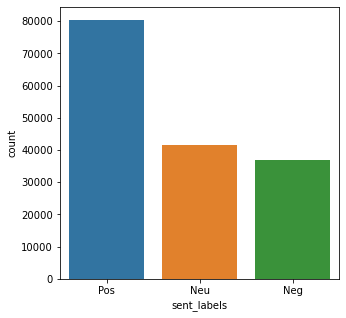

In [49]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sent_labels', data = data_df)

Text(0.5, 1.0, 'Distribution of sentiments')

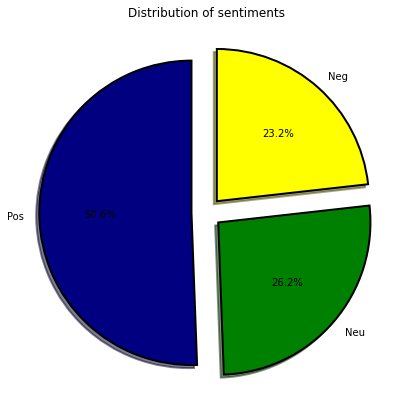

In [50]:
fig = plt.figure(figsize=(7,7))
colors = ("navy", "green", "yellow")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data_df['sent_labels'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [51]:
data_df[data_df['sent_labels']=='Neg']

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted,sent_polarity,sent_labels
8,Sorry if the word 'nonsense' was offensive to ...,sorry if the word nonsense was offensive to yo...,"[sorry, if, the, word, nonsense, was, offensiv...","[sorry, word, nonsense, offensive, anyway, im,...","[sorry, word, nonsense, offensive, anyway, im,...",sorry word nonsense offensive anyway im intend...,-0.300000,Neg
9,alignment on this subject and which are contra...,alignment on this subject and which are contra...,"[alignment, on, this, subject, and, which, are...","[alignment, subject, contrary, dulithgow]","[alignment, subject, contrary, dulithgow]",alignment subject contrary dulithgow,-0.166667,Neg
25,Radial symmetry \n\nSeveral now extinct lineag...,radial symmetry several now extinct lineages i...,"[radial, symmetry, several, now, extinct, line...","[radial, symmetry, several, extinct, lineages,...","[radial, symmetry, several, extinct, lineage, ...",radial symmetry several extinct lineage includ...,-0.200000,Neg
26,There's no need to apologize. A Wikipedia arti...,theres no need to apologize a wikipedia articl...,"[theres, no, need, to, apologize, a, wikipedia...","[theres, need, apologize, wikipedia, article, ...","[there, need, apologize, wikipedia, article, m...",there need apologize wikipedia article made re...,-0.083333,Neg
27,"Yes, because the mother of the child in the ca...",yes because the mother of the child in the cas...,"[yes, because, the, mother, of, the, child, in...","[yes, mother, child, case, michael, jackson, s...","[yes, mother, child, case, michael, jackson, s...",yes mother child case michael jackson studied ...,-0.200000,Neg
...,...,...,...,...,...,...,...,...
159554,and i'm going to keep posting the stuff u dele...,and im going to keep posting the stuff u delet...,"[and, im, going, to, keep, posting, the, stuff...","[im, going, keep, posting, stuff, u, deleted, ...","[im, going, keep, posting, stuff, u, deleted, ...",im going keep posting stuff u deleted fucking ...,-0.366667,Neg
159556,"I'll be on IRC, too, if you have a more specif...",ill be on irc too if you have a more specific ...,"[ill, be, on, irc, too, if, you, have, a, more...","[ill, irc, specific, request]","[ill, irc, specific, request]",ill irc specific request,-0.250000,Neg
159563,"""\nplease identify what part of BLP applies be...",please identify what part of blp applies becau...,"[please, identify, what, part, of, blp, applie...","[please, identify, part, blp, applies, blp, cl...","[please, identify, part, blp, applies, blp, cl...",please identify part blp applies blp clearly s...,-0.009524,Neg
159567,You should be ashamed of yourself \n\nThat is ...,you should be ashamed of yourself that is a ho...,"[you, should, be, ashamed, of, yourself, that,...","[ashamed, horrible, thing, put, talk, page]","[ashamed, horrible, thing, put, talk, page]",ashamed horrible thing put talk page,-1.000000,Neg


In [52]:
data_df[data_df['sent_labels']=='Neg'].shape

(36900, 8)

## Word Cloud for negative words

In [53]:
neg_tw=data_df[data_df['sent_labels']=='Neg']
neg_tw = data_df.sort_values(['sent_polarity'], ascending= False)
neg_tw.head()

,comment_text,comment_text_data,Tokens,Without Stopwords,Lemmatize,Comment_Text_Formatted,sent_polarity,sent_labels
76373,my name is ben i am a child of southampton i g...,my name is ben i am a child of southampton i g...,"[my, name, is, ben, i, am, a, child, of, south...","[name, ben, child, southampton, grew, pc, lapt...","[name, ben, child, southampton, grew, pc, lapt...",name ben child southampton grew pc laptop best...,1.0,Pos
19427,", at best, an emerging",at best an emerging,"[at, best, an, emerging]","[best, emerging]","[best, emerging]",best emerging,1.0,Pos
29800,This article needs to be thoroughly expanded. ...,this article needs to be thoroughly expanded i...,"[this, article, needs, to, be, thoroughly, exp...","[article, needs, thoroughly, expanded, try, best]","[article, need, thoroughly, expanded, try, best]",article need thoroughly expanded try best,1.0,Pos
63614,Wp: CiTe \n\nI understand it perfectly well. H...,wp cite i understand it perfectly well however...,"[wp, cite, i, understand, it, perfectly, well,...","[wp, cite, understand, perfectly, well, howeve...","[wp, cite, understand, perfectly, well, howeve...",wp cite understand perfectly well however say ...,1.0,Pos
157583,Ryan Drummond\n\nAre you trying to force my ha...,ryan drummondare you trying to force my hand b...,"[ryan, drummondare, you, trying, to, force, my...","[ryan, drummondare, trying, force, hand, best,...","[ryan, drummondare, trying, force, hand, best,...",ryan drummondare trying force hand best interest,1.0,Pos


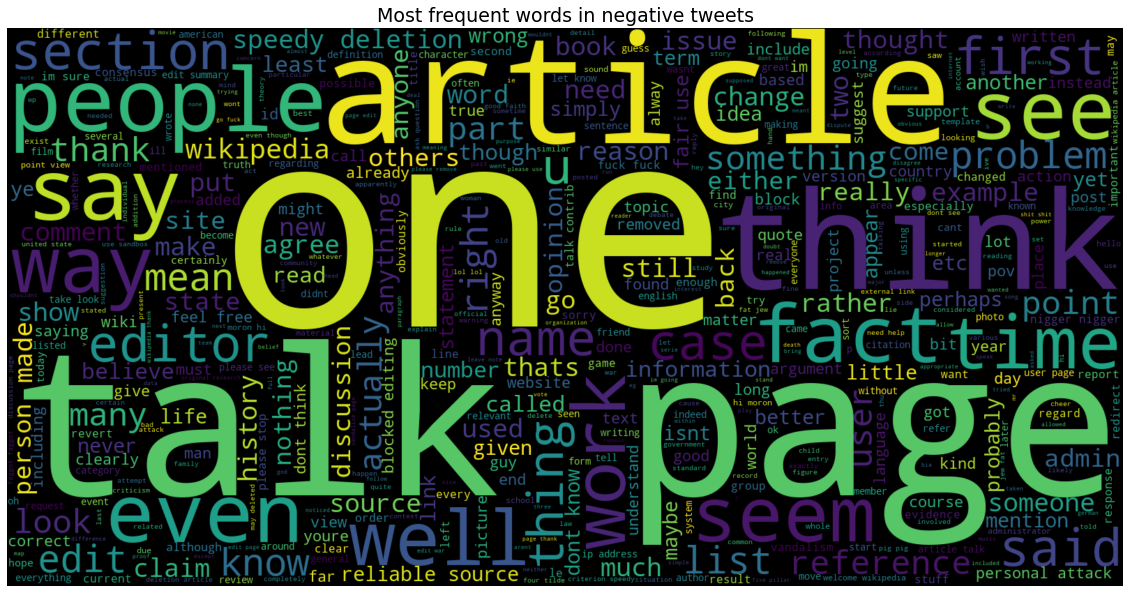

In [54]:
text = ' '.join([word for word in neg_tw['Comment_Text_Formatted']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

# Extracting the Negative Tweets

In [55]:
negative_df=data_df[data_df['sent_labels']=='Neg']

In [63]:
neg_df=negative_df[['Comment_Text_Formatted']]

In [64]:
neg_df.head()

,Comment_Text_Formatted
8,sorry word nonsense offensive anyway im intend...
9,alignment subject contrary dulithgow
25,radial symmetry several extinct lineage includ...
26,there need apologize wikipedia article made re...
27,yes mother child case michael jackson studied ...


In [65]:
neg_df.reset_index(inplace = True)

In [66]:
neg_df.drop('index',axis=1,inplace=True)

C:\Users\devel\AppData\Local\Temp\ipykernel_17620\592322917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_df.drop('index',axis=1,inplace=True)


In [67]:
neg_df.head()

,Comment_Text_Formatted
0,sorry word nonsense offensive anyway im intend...
1,alignment subject contrary dulithgow
2,radial symmetry several extinct lineage includ...
3,there need apologize wikipedia article made re...
4,yes mother child case michael jackson studied ...


In [70]:
corpus = list(neg_df['Comment_Text_Formatted'])
corpus = corpus[0:100]

### Sentence Embedding

In [61]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

# Clustering

In [71]:
corpus_embeddings = model.encode(corpus)

In [72]:
corpus_embeddings

array([[ 2.99075898e-02,  6.97624758e-02, -1.76456962e-02, ...,
         7.41511136e-02,  6.57297745e-02,  7.58771598e-02],
       [-4.33485582e-02,  4.69465889e-02, -2.69215535e-02, ...,
         7.20313489e-02,  5.98501042e-02, -4.30916511e-02],
       [ 7.12926015e-02,  1.20684020e-01,  8.19108635e-03, ...,
         1.06976628e-02,  9.32190642e-02,  1.56272370e-02],
       ...,
       [-1.01165762e-02,  4.86376807e-02,  1.66916531e-02, ...,
         4.18319181e-02,  1.40433878e-01, -5.94743565e-02],
       [ 1.73013713e-02,  2.51256395e-02,  6.58777729e-03, ...,
         1.26638431e-02, -7.09818304e-02, -7.06547573e-02],
       [-2.28479169e-02, -5.68881296e-02,  1.30134225e-02, ...,
         1.11299698e-04,  6.14613332e-02, -1.09220266e-01]], dtype=float32)

### K-Means Clustering

In [79]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(corpus_embeddings)


C:\Users\devel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1])

In [81]:
cluster_no = kmeans.labels_

In [82]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_no
cluster_df.head()

,corpus,cluster
0,sorry word nonsense offensive anyway im intend...,0
1,alignment subject contrary dulithgow,0
2,radial symmetry several extinct lineage includ...,0
3,there need apologize wikipedia article made re...,0
4,yes mother child case michael jackson studied ...,2


In [83]:
num_clusters=3

In [85]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_no):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['sorry word nonsense offensive anyway im intending write anything articlewow would jump vandalism im merely requesting encyclopedic one use school reference selective breeding page almost stub point animal breeding short messy article give info must someone around expertise eugenics', 'alignment subject contrary dulithgow', 'radial symmetry several extinct lineage included echinodermata bilateral homostelea even asymmetrical cothurnocystis stylophora', 'there need apologize wikipedia article made reconciling knowledge subject different source youve done history study archaeology study guess could scan page email could ask someone translate page', 'ok take bit work cant quite picture example base duck', 'ga review ii im sorry say fail article gan several major problem brought article previous ga assessment issued said article wplead longer history medium attention academic student government demographic trivia additional information section deficient citiations also triva ad

## Word Cloud for all the clusters

In [91]:
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(wc)
    fig7 = plt.figure(figsize=(20,15), facecolor='None')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Most frequent words of negative tweets of cluster number:{label}', fontsize=19)
    plt.show()

### Cluster No:0

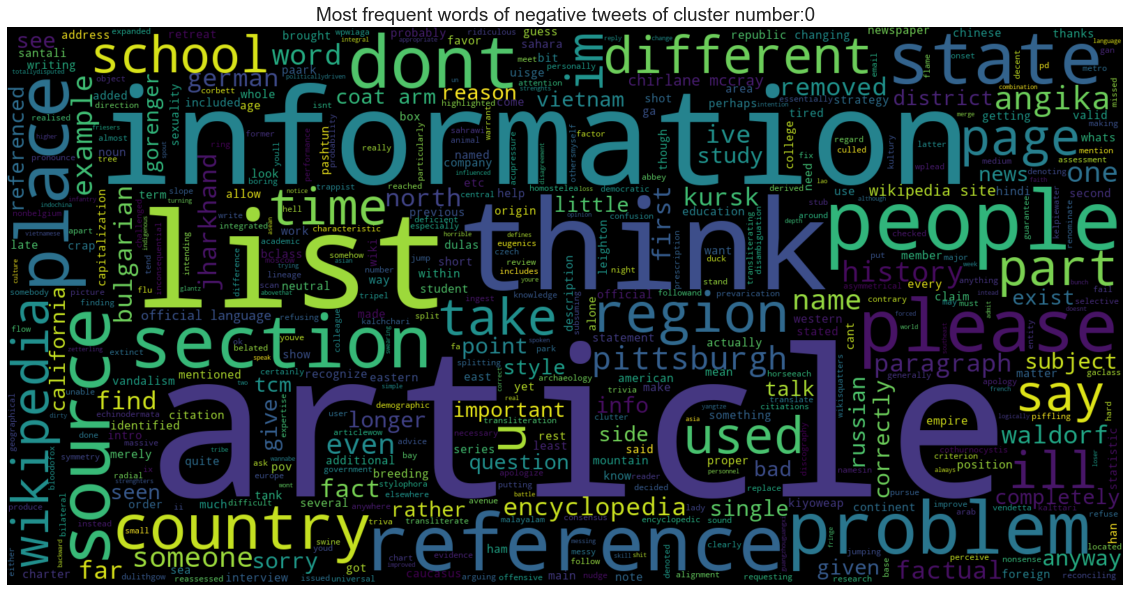

In [92]:
word_cloud(cluster_df,0)

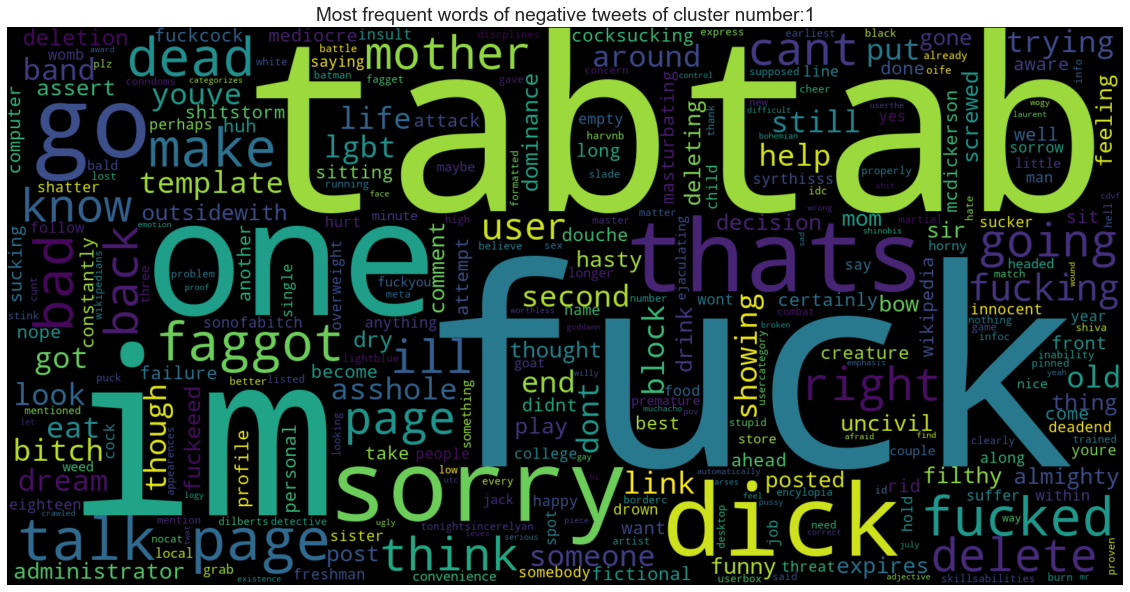

In [93]:
word_cloud(cluster_df,1)

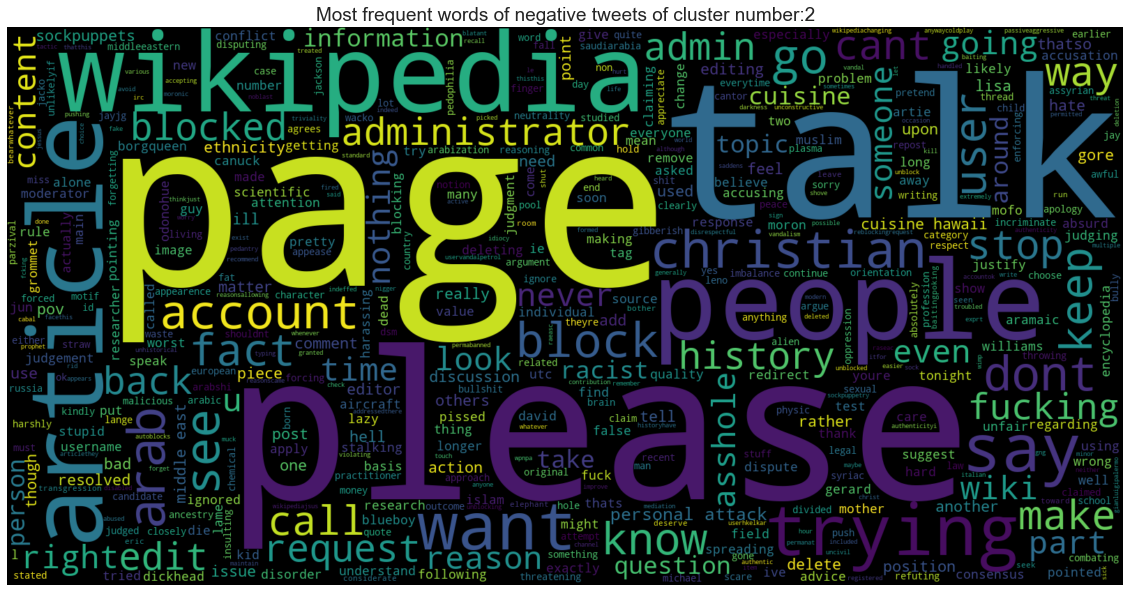

In [94]:
word_cloud(cluster_df,2)

# From the above clusters we can see that cluster 1 has high negative tweets, cluster 2: medium negative tweets and cluster 0: less negative tweets.